# Visión Artificial

## **Estudiante:** Emanuel Acevedo Muñoz

## **Nuestro objetivo**
Segmentar un elemento dentro de una imagen utilizando librerías de manipulación de imágenes (internamente matrices).
En este caso queremos segmentar las uvas que contiene la imagen.


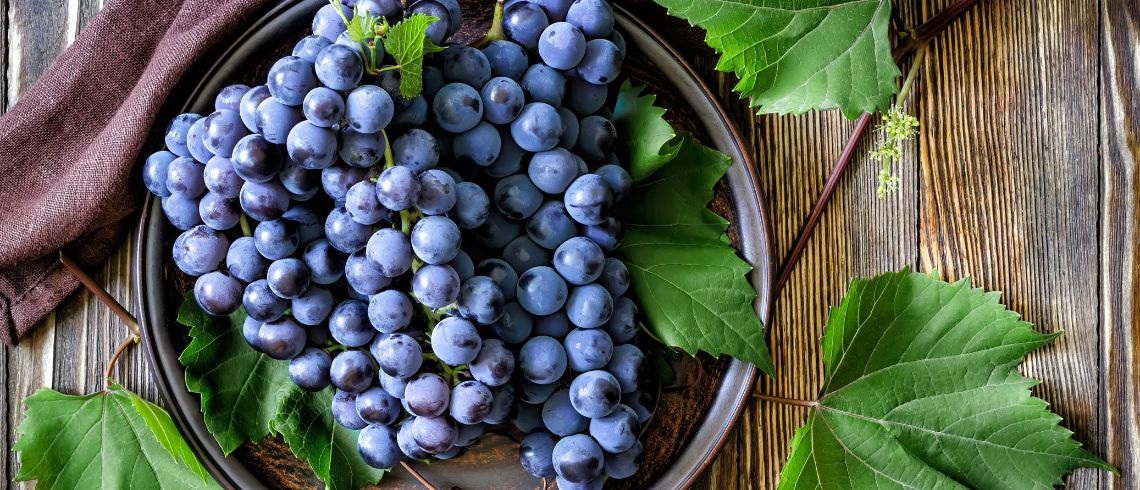

In [1]:
from PIL import Image, ImageFilter
from matplotlib.pyplot import imshow

import numpy as np
import matplotlib.pyplot as plt
import cv2

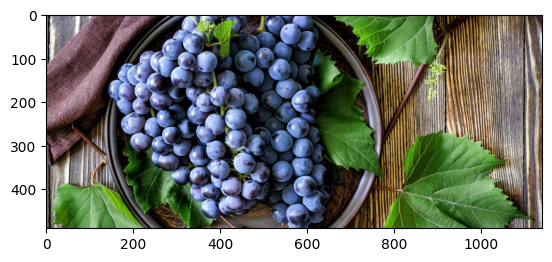

In [2]:
img_cv2 = cv2.imread("/content/uva-isabell-una-apuesta-de-innovacion-por-explorar.jpg", cv2.IMREAD_UNCHANGED)
img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(img_cv2, cmap="gray")

In [3]:
print("Las dimensiones de la imagen son", (img_cv2.shape[0], img_cv2.shape[1]))

Las dimensiones de la imagen son (490, 1140)


Aplicamos un filtro para obtener un mejor contraste

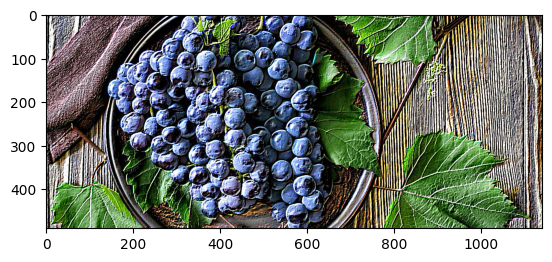

In [4]:
kernel = np.array([
  [-2, -1, 0],
  [-1, 1, 1],
  [0, 1, 2]
]) # Create NumPy kernel

img_cv2 = cv2.filter2D(img_cv2, -1, kernel)
plt.imshow(img_cv2, cmap="gray")

Extraer canales RGB de la imagen a color

In [5]:
canal_r = img_cv2[:,:,0]
canal_g = img_cv2[:,:,1]
canal_b = img_cv2[:,:,2]

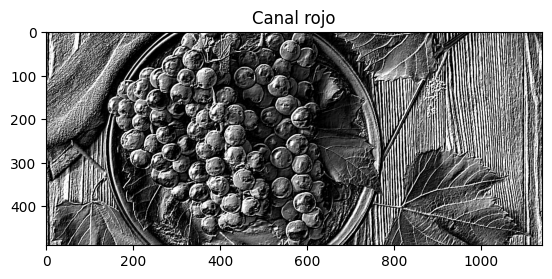

In [6]:
plt.title("Canal rojo")
plt.imshow(canal_r, cmap="gray")

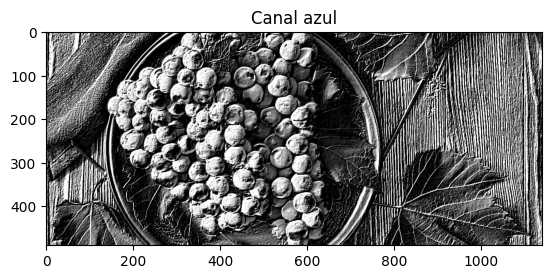

In [7]:
plt.title("Canal azul")
plt.imshow(canal_b, cmap="gray")

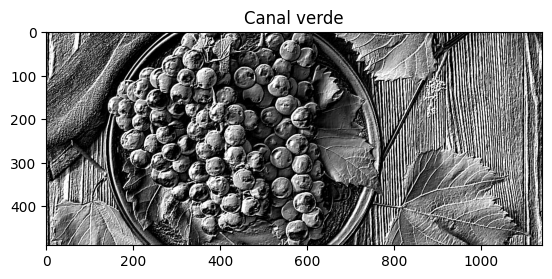

In [8]:
plt.title("Canal verde")
plt.imshow(canal_g, cmap="gray")

Histograma de intensidades

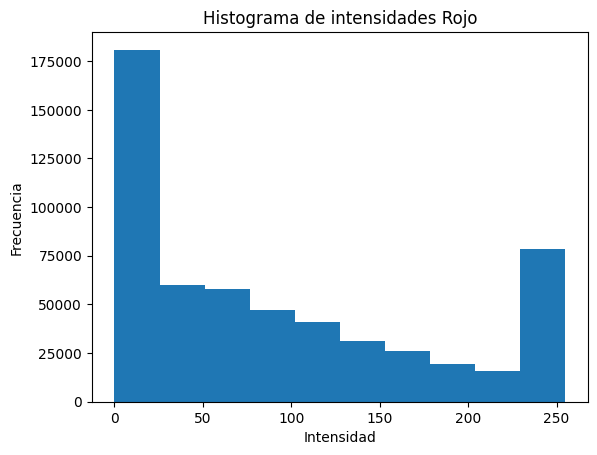

In [9]:
plt.title("Histograma de intensidades Rojo")
plt.ylabel("Frecuencia")
plt.xlabel("Intensidad")
plt.hist(canal_r.ravel())
plt.show()

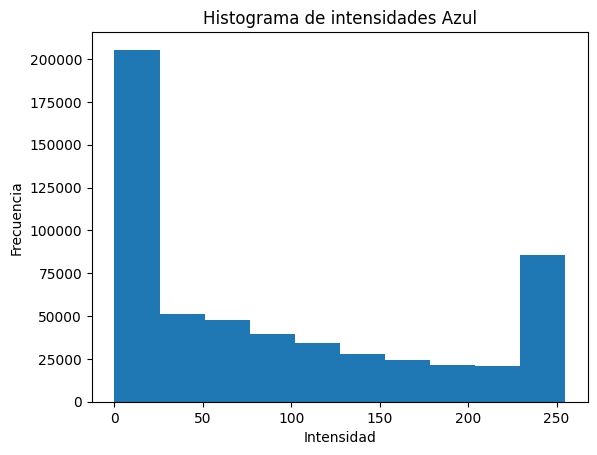

In [10]:
plt.title("Histograma de intensidades Azul")
plt.ylabel("Frecuencia")
plt.xlabel("Intensidad")
plt.hist(canal_b.ravel())
plt.show()

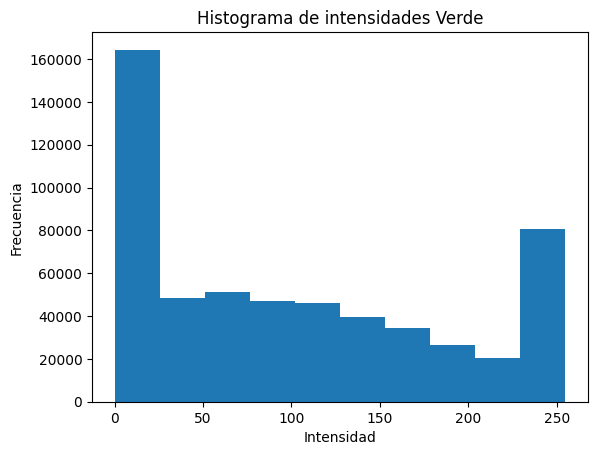

In [11]:
plt.title("Histograma de intensidades Verde")
plt.ylabel("Frecuencia")
plt.xlabel("Intensidad")
plt.hist(canal_g.ravel())
plt.show()

Vamos a crear una mascara

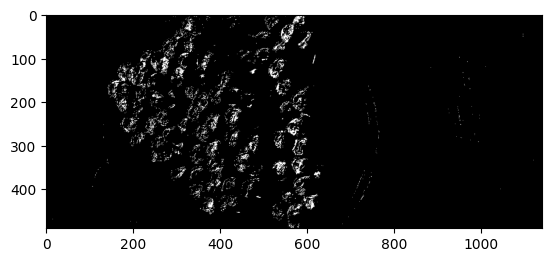

In [12]:
condicion = (canal_b > 205) & (canal_g > 113) & (canal_r < 153)
plt.imshow(condicion, cmap="gray")

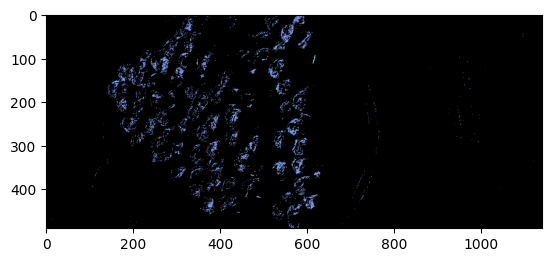

In [13]:
mascara = np.stack([condicion,condicion,condicion], axis=2)
masked_image = (np.multiply(img_cv2, mascara))
plt.imshow(masked_image, cmap="gray")